In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import itertools

In [2]:
df=pd.read_excel('IMDBTop250.xlsx')
df=df.drop('Unnamed: 0', axis=1)
df.head()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Rating,Score,Votes,Gross,...,Rate10,Rate9,Rate8,Rate7,Rate6,Rate5,Rate4,Rate3,Rate2,Rate1
0,1,1996,/title/tt0076759/,Star Wars,1977,121,8.6,90.0,1141596,322.74,...,335,197,173,76,47,33,18,5,5,29
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,9.3,80.0,2146449,28.34,...,403,189,148,70,33,21,10,8,10,17
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,8.1,83.0,598474,16.50,...,100,147,228,120,71,43,19,16,13,42
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,8.5,77.0,924114,23.34,...,203,225,175,100,52,38,16,10,11,24
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,8.3,NaN,48093,NaN,...,70,85,117,73,42,19,9,5,5,14


In [3]:
g1=df['Genre1'].unique().tolist()
g2=df['Genre2'].unique().tolist()
g3=df['Genre2'].unique().tolist()
genre=set(g1+g2+g3)
genre = [x for x in genre if str(x) != 'nan']


c1=df['Cast1'].unique().tolist()
c2=df['Cast2'].unique().tolist()
c3=df['Cast3'].unique().tolist()
c4=df['Cast4'].unique().tolist()
cast=set(c1 + c2 + c3 + c4)
cast = [x for x in cast if str(x) != 'nan']

df['Director']=df['Director'].apply(lambda x: x.replace('Ethan Coen,  Joel Coen', 'Joel Coen,  Ethan Coen'))
df2=df
df2['Title']=df2['Title'].apply(lambda x: x.replace('The Lord of the Rings', 'LOTR'))

df.head()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Rating,Score,Votes,Gross,...,Rate10,Rate9,Rate8,Rate7,Rate6,Rate5,Rate4,Rate3,Rate2,Rate1
0,1,1996,/title/tt0076759/,Star Wars,1977,121,8.6,90.0,1141596,322.74,...,335,197,173,76,47,33,18,5,5,29
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,9.3,80.0,2146449,28.34,...,403,189,148,70,33,21,10,8,10,17
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,8.1,83.0,598474,16.50,...,100,147,228,120,71,43,19,16,13,42
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,8.5,77.0,924114,23.34,...,203,225,175,100,52,38,16,10,11,24
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,8.3,NaN,48093,NaN,...,70,85,117,73,42,19,9,5,5,14


In [4]:
round(df.describe(), 2)

,Ranking,IMDByear,Date,RunTime,Rating,Score,Votes,Gross,#top1000,Rate10,Rate9,Rate8,Rate7,Rate6,Rate5,Rate4,Rate3,Rate2,Rate1
count,5750.00,5750.00,5750.00,5750.00,5750.00,4761.00,5750.00,4891.00,5750.00,5750.00,5750.00,5750.00,5750.00,5750.00,5750.00,5750.00,5750.00,5750.00,5750.00
mean,125.50,2007.00,1977.55,125.02,8.16,84.23,409208.44,70.52,702.37,147.20,125.22,175.88,107.04,52.54,30.66,15.99,11.85,10.17,25.83
std,72.17,6.63,23.25,30.64,0.33,10.19,405166.54,100.04,145.49,74.85,50.28,43.96,26.01,15.19,8.74,5.69,4.35,4.67,9.23
min,1.00,1996.00,1920.00,16.00,5.50,61.00,8095.00,0.01,197.00,13.00,3.00,7.00,19.00,18.00,12.00,1.00,2.00,1.00,9.00
25%,63.00,2001.00,1959.00,104.00,8.00,77.00,99811.00,5.45,605.00,95.00,90.00,147.00,89.00,42.00,25.00,12.00,9.00,7.00,19.00
50%,125.50,2007.00,1982.00,121.00,8.10,85.00,241922.50,28.97,713.00,135.00,123.00,176.00,104.00,51.00,30.00,15.00,12.00,10.00,24.00
75%,188.00,2013.00,1997.00,137.00,8.30,92.00,632467.00,91.56,827.75,186.00,158.00,207.00,123.00,61.00,35.00,19.00,15.00,13.00,30.00
max,250.00,2018.00,2018.00,321.00,9.30,100.00,2146449.00,936.66,935.00,432.00,247.00,301.00,290.00,168.00,88.00,42.00,33.00,30.00,73.00


# How many different movie was entered on IMDB Top250 lists from 1996 to 2018?

In [5]:
# 96-18 yıllarında kaç farklı film listeye girmiş
df.Title.nunique()

708

# Movies that are always on the IMDB Top250 lists from 1996 to 2018?

In [6]:
# 1996'dan itibaren bütün IMDB Top250 listelerinde bulunan filmler
hep=[]
lis=df.Title.unique().tolist()

for i in lis:
    h=df[df.Title==i]
    if h.groupby('IMDByear').count().shape[0]==23:
        hep.append(i)
        
file=open('23SenedirListedeOlanFilmler.txt','w')

for element in hep:
     file.write(element)
     file.write('\n')
file.close()
hep

['Star Wars',
 'The Shawshank Redemption',
 'Trainspotting',
 'The Usual Suspects',
 'Casablanca',
 'Blade Runner',
 "Schindler's List",
 'Citizen Kane',
 'Pulp Fiction',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb',
 'The Godfather',
 'Braveheart',
 'Toy Story',
 "One Flew Over the Cuckoo's Nest",
 'Fargo',
 'Shichinin no samurai',
 'Star Wars: Episode V - The Empire Strikes Back',
 'Léon',
 'The Princess Bride',
 '2001: A Space Odyssey',
 'Reservoir Dogs',
 'Raiders of the Lost Ark',
 'Monty Python and the Holy Grail',
 'Rear Window',
 'Se7en',
 'Aliens',
 'A Clockwork Orange',
 'Il buono, il brutto, il cattivo',
 "It's a Wonderful Life",
 'To Kill a Mockingbird',
 '12 Angry Men',
 'Lawrence of Arabia',
 'North by Northwest',
 'Apocalypse Now',
 'Goodfellas',
 'Star Wars: Episode VI - Return of the Jedi',
 'Once Upon a Time in the West',
 'Nuovo Cinema Paradiso',
 'Taxi Driver',
 'The Silence of the Lambs',
 'Vertigo',
 'Alien',
 'The Third Man',
 'The Godf

In [7]:
len(hep)

82

# Movies that are on the IMDB Top250 lists for the past decade:

In [8]:
# Son 10 sene IMDB Top250'de aralıksız duran filmler
son10=[]
lis=df.Title.unique().tolist()
df10=df[df['IMDByear'] > 2008]
for i in lis:
    h=df10[df10.Title==i]
    if h.groupby('IMDByear').count().shape[0]==10:
        son10.append(i)
        
file=open('Son10SeneAraliksiz.txt','w')

for element in son10:
     file.write(element)
     file.write('\n')
file.close()

son10

['Star Wars',
 'The Shawshank Redemption',
 'Trainspotting',
 'The Usual Suspects',
 'Casablanca',
 'Blade Runner',
 "Schindler's List",
 'Citizen Kane',
 'Pulp Fiction',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb',
 'The Godfather',
 'Braveheart',
 'Toy Story',
 "One Flew Over the Cuckoo's Nest",
 'Fargo',
 'Shichinin no samurai',
 'Star Wars: Episode V - The Empire Strikes Back',
 'Léon',
 'The Princess Bride',
 '2001: A Space Odyssey',
 'Reservoir Dogs',
 'Raiders of the Lost Ark',
 'Monty Python and the Holy Grail',
 'Rear Window',
 'Se7en',
 'Aliens',
 'A Clockwork Orange',
 'Il buono, il brutto, il cattivo',
 "It's a Wonderful Life",
 'To Kill a Mockingbird',
 '12 Angry Men',
 'Lawrence of Arabia',
 'North by Northwest',
 'Apocalypse Now',
 'Goodfellas',
 'Star Wars: Episode VI - Return of the Jedi',
 'Once Upon a Time in the West',
 'Nuovo Cinema Paradiso',
 'Taxi Driver',
 'Heat',
 'The Silence of the Lambs',
 'Vertigo',
 'Alien',
 'The Third Man',
 

In [9]:
len(son10)

164

# Movies that are on the IMDB Top250 lists for the last 5 years:

In [10]:
# Son 10 sene IMDB Top250'de aralıksız duran filmler
son5=[]
lis=df.Title.unique().tolist()
df5=df[df['IMDByear'] > 2013]
for i in lis:
    h=df5[df5.Title==i]
    if h.groupby('IMDByear').count().shape[0]==5:
        son5.append(i)
        
file=open('Son5SeneAraliksiz.txt','w')

for element in son5:
     file.write(element)
     file.write('\n')
file.close()

son5

['Star Wars',
 'The Shawshank Redemption',
 'Trainspotting',
 'The Usual Suspects',
 'Casablanca',
 'Blade Runner',
 "Schindler's List",
 'Citizen Kane',
 'Pulp Fiction',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb',
 'The Godfather',
 'Braveheart',
 'Toy Story',
 "One Flew Over the Cuckoo's Nest",
 'Fargo',
 'Shichinin no samurai',
 'Star Wars: Episode V - The Empire Strikes Back',
 'Léon',
 'The Princess Bride',
 '2001: A Space Odyssey',
 'Reservoir Dogs',
 'Raiders of the Lost Ark',
 'Monty Python and the Holy Grail',
 'Rear Window',
 'Se7en',
 'Aliens',
 'A Clockwork Orange',
 'Il buono, il brutto, il cattivo',
 "It's a Wonderful Life",
 'To Kill a Mockingbird',
 '12 Angry Men',
 'Lawrence of Arabia',
 'North by Northwest',
 'Apocalypse Now',
 'Goodfellas',
 'Star Wars: Episode VI - Return of the Jedi',
 'Once Upon a Time in the West',
 'Nuovo Cinema Paradiso',
 'Taxi Driver',
 'Heat',
 'The Silence of the Lambs',
 'Vertigo',
 'Alien',
 'The Third Man',
 

In [11]:
len(son5)

206

# Movies that are come out and enter the list same year:

In [12]:
#Vizyona girdiği sene IMDB Top250'ye giren filmler
vis=df[df['IMDByear']==df['Date']].sort_values('Ranking')
vis

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Rating,Score,Votes,Gross,...,Rate10,Rate9,Rate8,Rate7,Rate6,Rate5,Rate4,Rate3,Rate2,Rate1
1250,1,2001,/title/tt0120737/,LOTR: The Fellowship of the Ring,2001,178,8.8,92.0,1540613,315.54,...,353,198,148,89,41,28,17,13,11,27
751,2,1999,/title/tt0169547/,American Beauty,1999,122,8.3,86.0,1005089,130.10,...,180,204,191,112,62,19,23,9,14,44
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,8.1,83.0,598474,16.50,...,100,147,228,120,71,43,19,16,13,42
1753,4,2003,/title/tt0167260/,LOTR: The Return of the King,2003,201,8.9,94.0,1525377,377.85,...,367,174,135,81,40,37,16,12,11,34
3003,4,2008,/title/tt0468569/,The Dark Knight,2008,152,9.0,84.0,2114705,534.86,...,321,197,168,112,47,22,17,8,13,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,243,2003,/title/tt0290334/,X2,2003,134,7.4,68.0,488602,214.95,...,105,96,255,186,112,43,20,23,10,21
2493,244,2005,/title/tt0121766/,Star Wars: Episode III - Revenge of the Sith,2005,140,7.5,68.0,651938,380.26,...,124,81,193,179,116,50,27,24,18,39
743,244,1998,/title/tt0118715/,The Big Lebowski,1998,117,8.1,71.0,675838,17.50,...,175,115,228,124,70,39,22,17,15,34
2994,245,2007,/title/tt0783233/,Atonement,2007,123,7.8,85.0,231858,50.93,...,57,59,179,143,60,41,23,17,19,24


In [13]:
vis.Title.tolist()

['LOTR: The Fellowship of the Ring',
 'American Beauty',
 'Trainspotting',
 'LOTR: The Return of the King',
 'The Dark Knight',
 'Saving Private Ryan',
 'Inception',
 'Star Trek: First Contact',
 'Titanic',
 'LOTR: The Two Towers',
 'The English Patient',
 'Interstellar',
 'L.A. Confidential',
 'Toy Story 2',
 'Being John Malkovich',
 'Beautiful Thing',
 'No Country for Old Men',
 'Lone Star',
 'Amélie',
 'The Sixth Sense',
 'Romeo + Juliet',
 'Fargo',
 'Avatar',
 'Toy Story 3',
 'The Truman Show',
 'The Green Mile',
 'Spider-Man: Into the Spider-Verse',
 'Coco',
 'Fight Club',
 'Eternal Sunshine of the Spotless Mind',
 'WALL·E',
 'That Thing You Do!',
 'The Matrix',
 'The Dark Knight Rises',
 'Star Wars: Episode VII - The Force Awakens',
 'Contact',
 'The Rock',
 'The Full Monty',
 'Black Swan',
 'Almost Famous',
 'Avengers: Infinity War',
 'Wo hu cang long',
 'A Time to Kill',
 'Slumdog Millionaire',
 'Inglourious Basterds',
 'Up',
 'The Curious Case of Benjamin Button',
 'Ransom',
 

(array([1990., 1995., 2000., 2005., 2010., 2015., 2020.]),
 <a list of 7 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

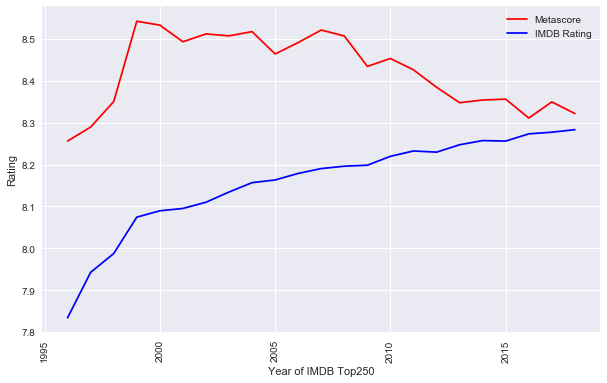

In [14]:
plt.figure()
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
metascore, = plt.plot((df.groupby(['IMDByear'])['Score'].mean())/10, color='red') #1-10 arasına indirgemek için
imdbrating, = plt.plot(df.groupby(['IMDByear'])['Rating'].mean(), color='blue')
plt.legend([metascore,imdbrating],["Metascore", "IMDB Rating"])
plt.xlabel('Year of IMDB Top250')
plt.ylabel('Rating')
plt.xticks(rotation=90)


Text(0.5, 1.0, 'Number of Movies by Year  \n (for the 708 movies that are on the list from 1996 to 2018)')

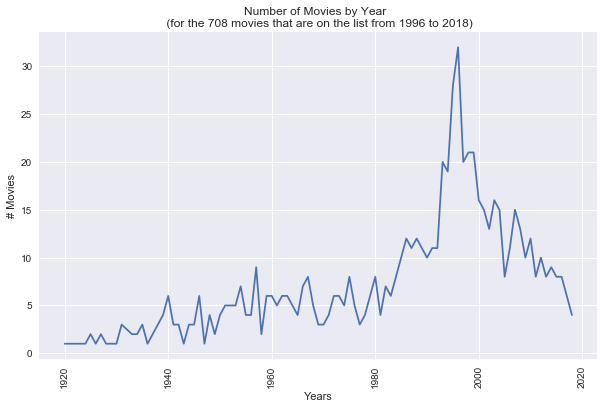

In [15]:
#Listedeki 708 farklı film için; Hangi sene kaç film çekilmiş?
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
plt.plot(df.groupby(['Date'])['Title'].nunique())
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('# Movies')
plt.title("Number of Movies by Year  \n (for the 708 movies that are on the list from 1996 to 2018)")


Text(0.5, 1.0, "How many Different Director's movie on the IMDB Top250 list Over Years?")

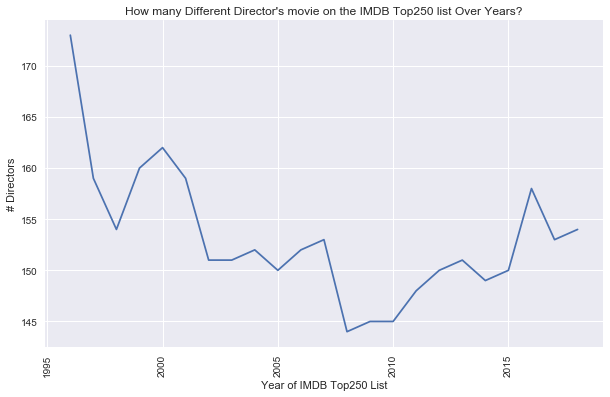

In [16]:
#Hangi yıl IMDB Top250'ye kaç farklı yönetmen girmiş?
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
plt.plot(df.groupby(['IMDByear'])['Director'].nunique())
plt.xticks(rotation=90)
plt.xlabel('Year of IMDB Top250 List')
plt.ylabel('# Directors')
plt.title("How many Different Director's movie on the IMDB Top250 list Over Years?")

Text(0.5, 1.0, 'Average Gross for IMDB Top250 Lists')

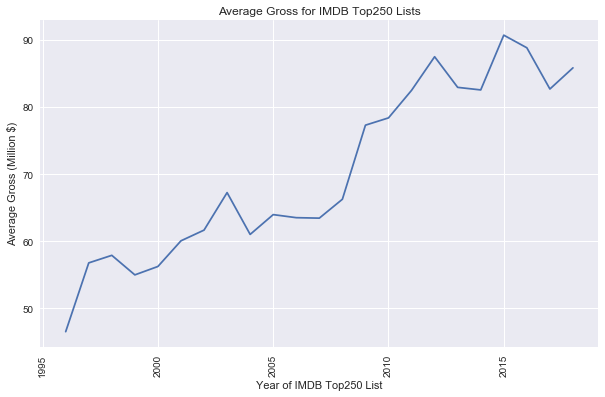

In [17]:
#IMDB listelerine göre ortalama hasılat
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
plt.plot(df.groupby(['IMDByear'])['Gross'].mean())
plt.xticks(rotation=90)
plt.xlabel('Year of IMDB Top250 List')
plt.ylabel('Average Gross (Million $)')
plt.title('Average Gross for IMDB Top250 Lists')

# Directors that have 3 movies on the IMDB Top 250 Lists From 1996 to 2018:

In [18]:
# 1996'dan itibaren her sene IMDB Top250'de en az üç filmi olan yönetmenler
direc=[]
lis=df.Director.unique().tolist()
for director in lis:
    di=df[df.Director==director]
    x=di.groupby('IMDByear').count()
    if x[x['Title'] >= 3].shape[0] >= 23:
        direc.append(director)
direc

['Steven Spielberg',
 'Stanley Kubrick',
 'Francis Ford Coppola',
 'Akira Kurosawa',
 'Alfred Hitchcock',
 'James Cameron',
 'Sergio Leone',
 'Martin Scorsese',
 'Charles Chaplin']

# Directors that have most movies on the IMDB Top250 Lists:

In [19]:
#Listelerde en fazla filmi olan yönetmenler:
title=[]
director=[]
lis=df.Director.unique().tolist()
fin=pd.DataFrame()
for i in lis:
    f=pd.DataFrame()
    a=df[df.Director==i]
    title=a.Title.nunique()
    director=i
    l=[director, title]
    f=f.append(l)
    fin=fin.append(f.transpose())
fin.columns=['Director', '#Movies']
fin=fin.sort_values('#Movies', ascending=False).head(25)
fin

,Director,#Movies
0,Alfred Hitchcock,13
0,Steven Spielberg,10
0,Stanley Kubrick,10
0,"Joel Coen, Ethan Coen",9
0,Akira Kurosawa,8
0,Martin Scorsese,8
0,Billy Wilder,8
0,Christopher Nolan,8
0,Peter Jackson,8
0,Clint Eastwood,6


In [20]:
dirs=fin.Director.tolist()
def label_for_director():
    lis=[]
    tem=pd.DataFrame()
    for i in dirs:
        q=df2[df2['Director']==i]
        t=str(q.Title.unique()).replace('\n', '')
        lis.append(t)
        tem=tem.append(lis)
    return tem


In [21]:
labels=label_for_director().drop_duplicates()
labels.columns=['listofstrings']
labels['strs'] = [''.join(map(str, l)) for l in labels['listofstrings']]

labels['strs']=labels['strs'].apply(lambda x: x.replace('[', '').replace(']', ''))
labels['strs']=labels['strs'].apply(lambda x: x.replace('', ''))



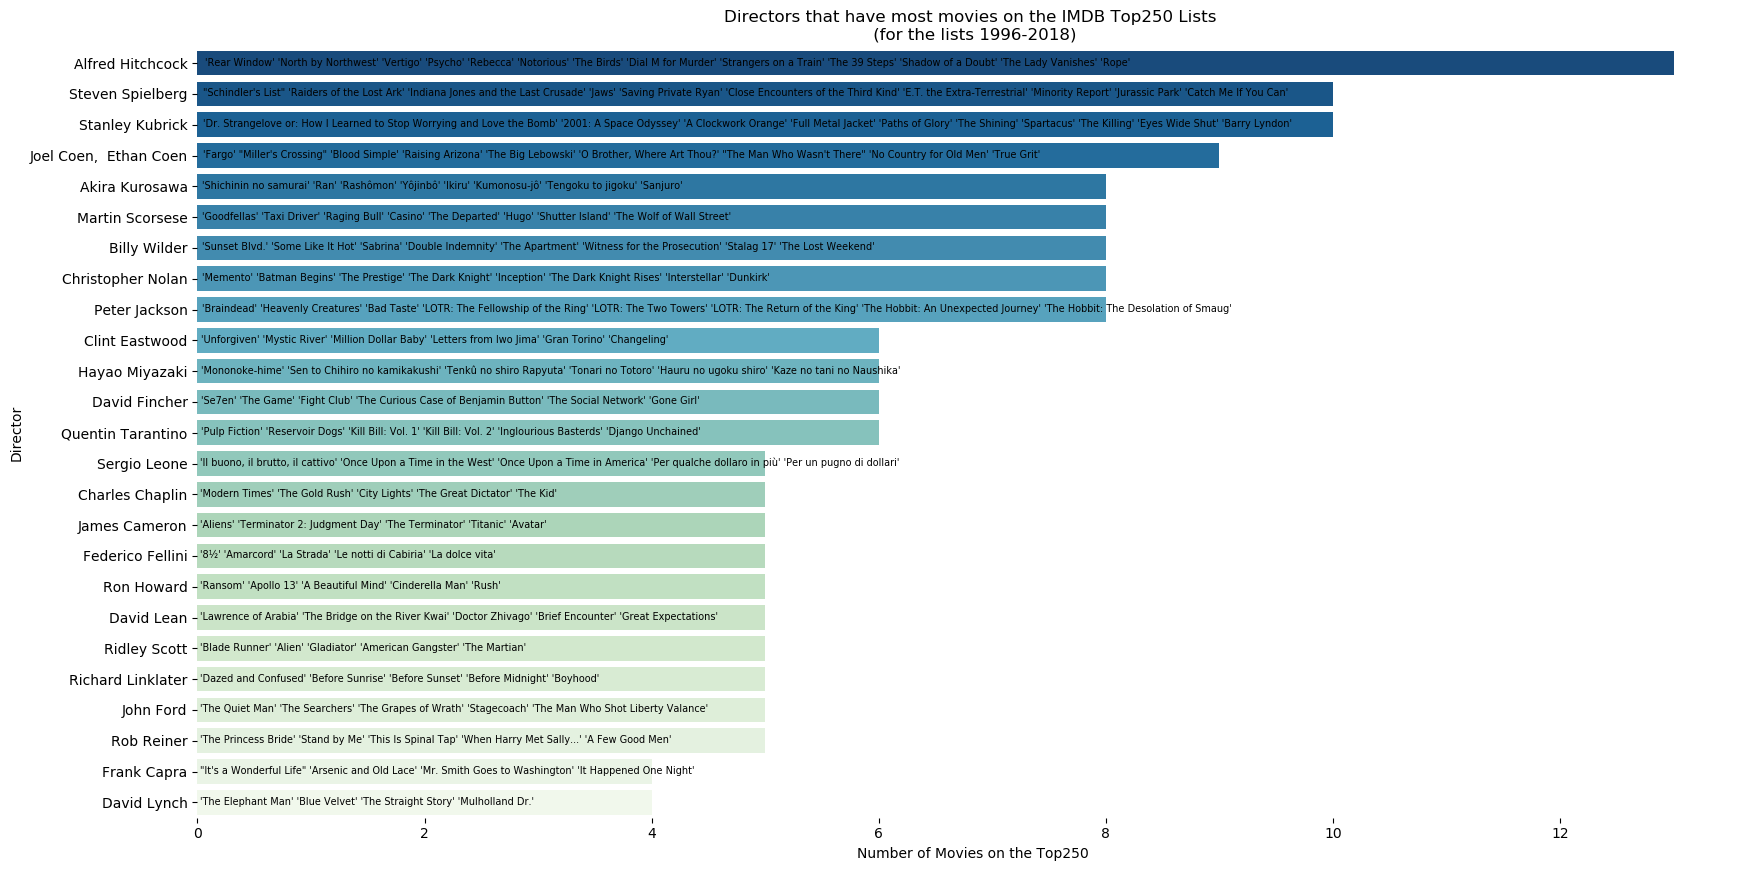

In [22]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot('#Movies', 'Director', data=fin, palette="GnBu_r")

plt.title("Directors that have most movies on the IMDB Top250 Lists \n (for the lists 1996-2018)")
plt.xlabel("Number of Movies on the Top250")

rects=ax.patches
for rect, label in zip(rects, labels.strs):
    bl = rect.get_xy()
    x = 0.005 * rect.get_width() + bl[0]
    y = 0.60 * rect.get_height() + bl[1]
    ax.text(x,y,label, ha='left', va='baseline', rotation='horizontal', fontsize=7)
sns.despine(bottom=True, left=True)


# Performers that have most movies on the IMDB Top250 Lists:

In [23]:
#Listelerde en fazla filmi olan oyuncular:
tit=[]
cas=[]
fin1=pd.DataFrame()
for i in cast:
    f=pd.DataFrame()
    a=df2[(df2.Cast1==i)|(df2.Cast2==i)|(df2.Cast3==i)|(df2.Cast4==i)]
    tit=a.Title.nunique()
    cas=i
    l=[cas, tit]
    f=f.append(l)
    fin1=fin1.append(f.transpose())
cf=fin1.sort_values(1, ascending=False).head(25)
cf.columns=['Cast', 'Count']
cf

,Cast,Count
0,Robert De Niro,13
0,Leonardo DiCaprio,10
0,Tom Hanks,10
0,Brad Pitt,9
0,Harrison Ford,9
0,James Stewart,9
0,Ian McKellen,8
0,Sean Connery,8
0,Johnny Depp,7
0,Al Pacino,7


In [24]:
def label_for_cast():
    lis=[]
    tem=pd.DataFrame()
    for i in cf.Cast.tolist():
        q=df2[(df2.Cast1==i)|(df2.Cast2==i)|(df2.Cast3==i)|(df2.Cast4==i)]
        t=str(q.Title.unique()).replace('\n', '')
        lis.append(t)
        tem=tem.append(lis)
    return tem


In [25]:
castlabels=label_for_cast().drop_duplicates()
castlabels.columns=['listofstrings']
castlabels['strs'] = [''.join(map(str, l)) for l in castlabels['listofstrings']]

castlabels['strs']=castlabels['strs'].apply(lambda x: x.replace('[', '').replace(']', ''))
castlabels['strs']=castlabels['strs'].apply(lambda x: x.replace('', ''))


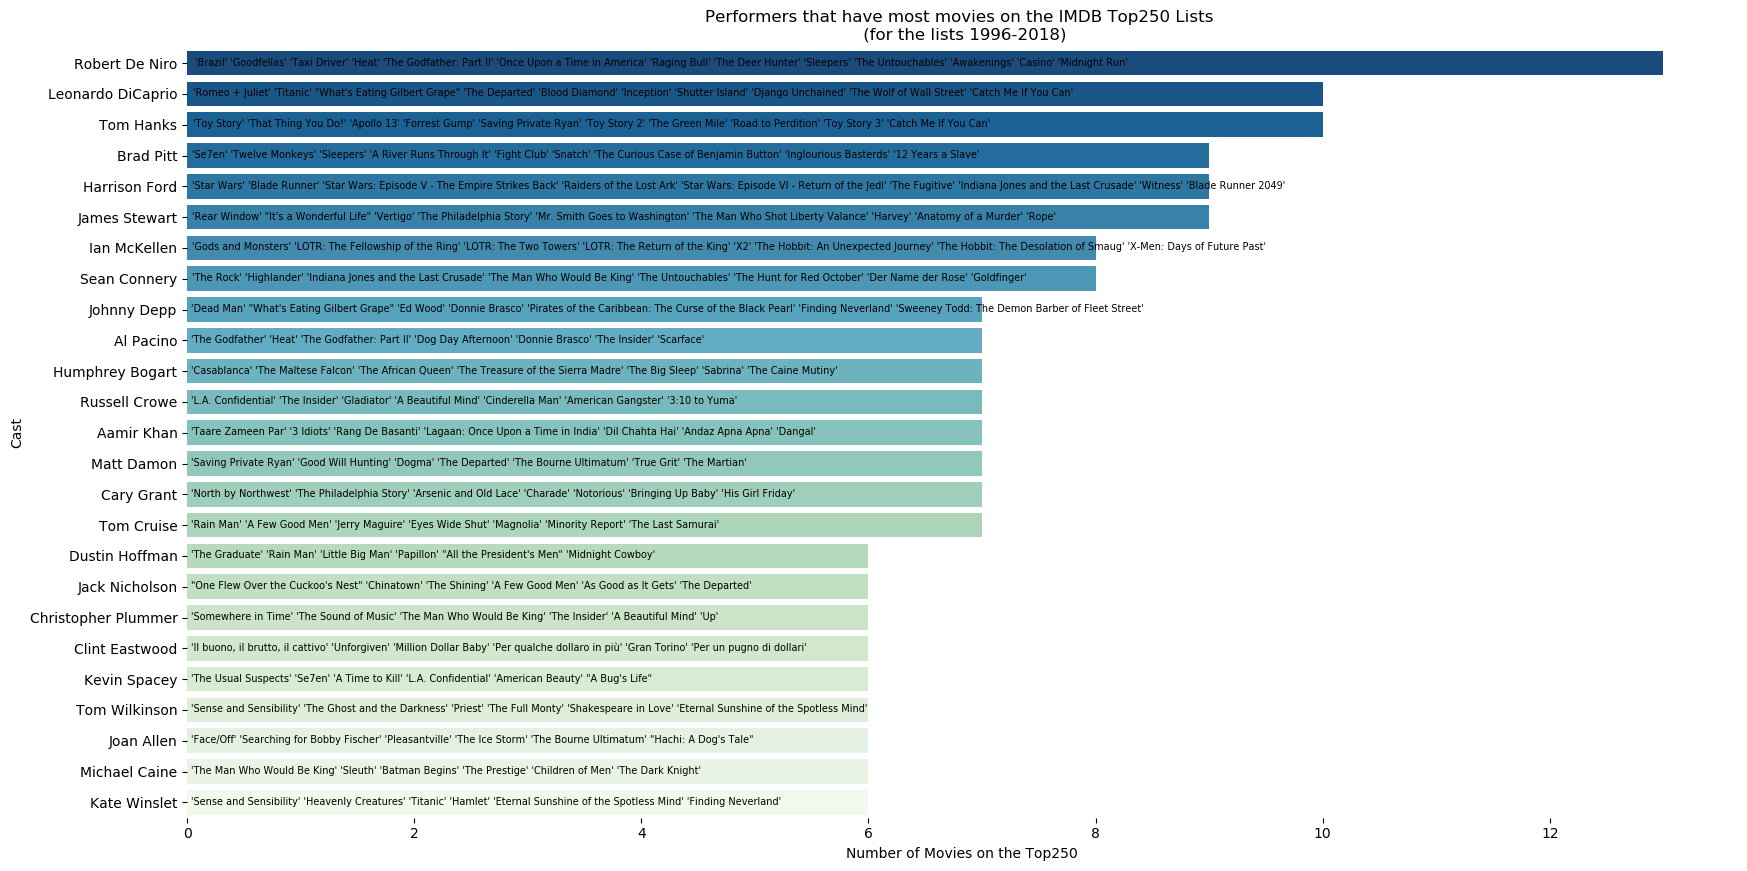

In [26]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot('Count', 'Cast', data=cf, palette="GnBu_r")

plt.title("Performers that have most movies on the IMDB Top250 Lists \n (for the lists 1996-2018)")
plt.xlabel("Number of Movies on the Top250")

rects=ax.patches
for rect, label in zip(rects, castlabels.strs):
    bl = rect.get_xy()
    x = 0.005 * rect.get_width() + bl[0]
    y = 0.60 * rect.get_height() + bl[1]
    ax.text(x,y,label, ha='left', va='baseline', rotation='horizontal', fontsize=7)
sns.despine(bottom=True, left=True)


# Ranking Changings for the Movies that are always on the IMBD Top250

In [27]:
#Sürekli listede bulunan filmler için yıllara göre sıralama değişimleri
hep1=hep.copy()
hep1.remove("The Shawshank Redemption") #its change is so little, we can't see significance change

mov=[]
dif=[]
changes=pd.DataFrame()
for i in hep1:
    temp=pd.DataFrame()
    h=df[df.Title==i]
    dif=h['Ranking'].iloc[0]-h['Ranking'].iloc[-1]
    mov=i
    l=[mov, dif]
    temp=temp.append(l)
    changes=changes.append(temp.transpose())
changes.columns=['Movie', 'Ranks Change']
changes=changes.apply(pd.to_numeric, errors='ignore')
changes=changes.sort_values('Movie')

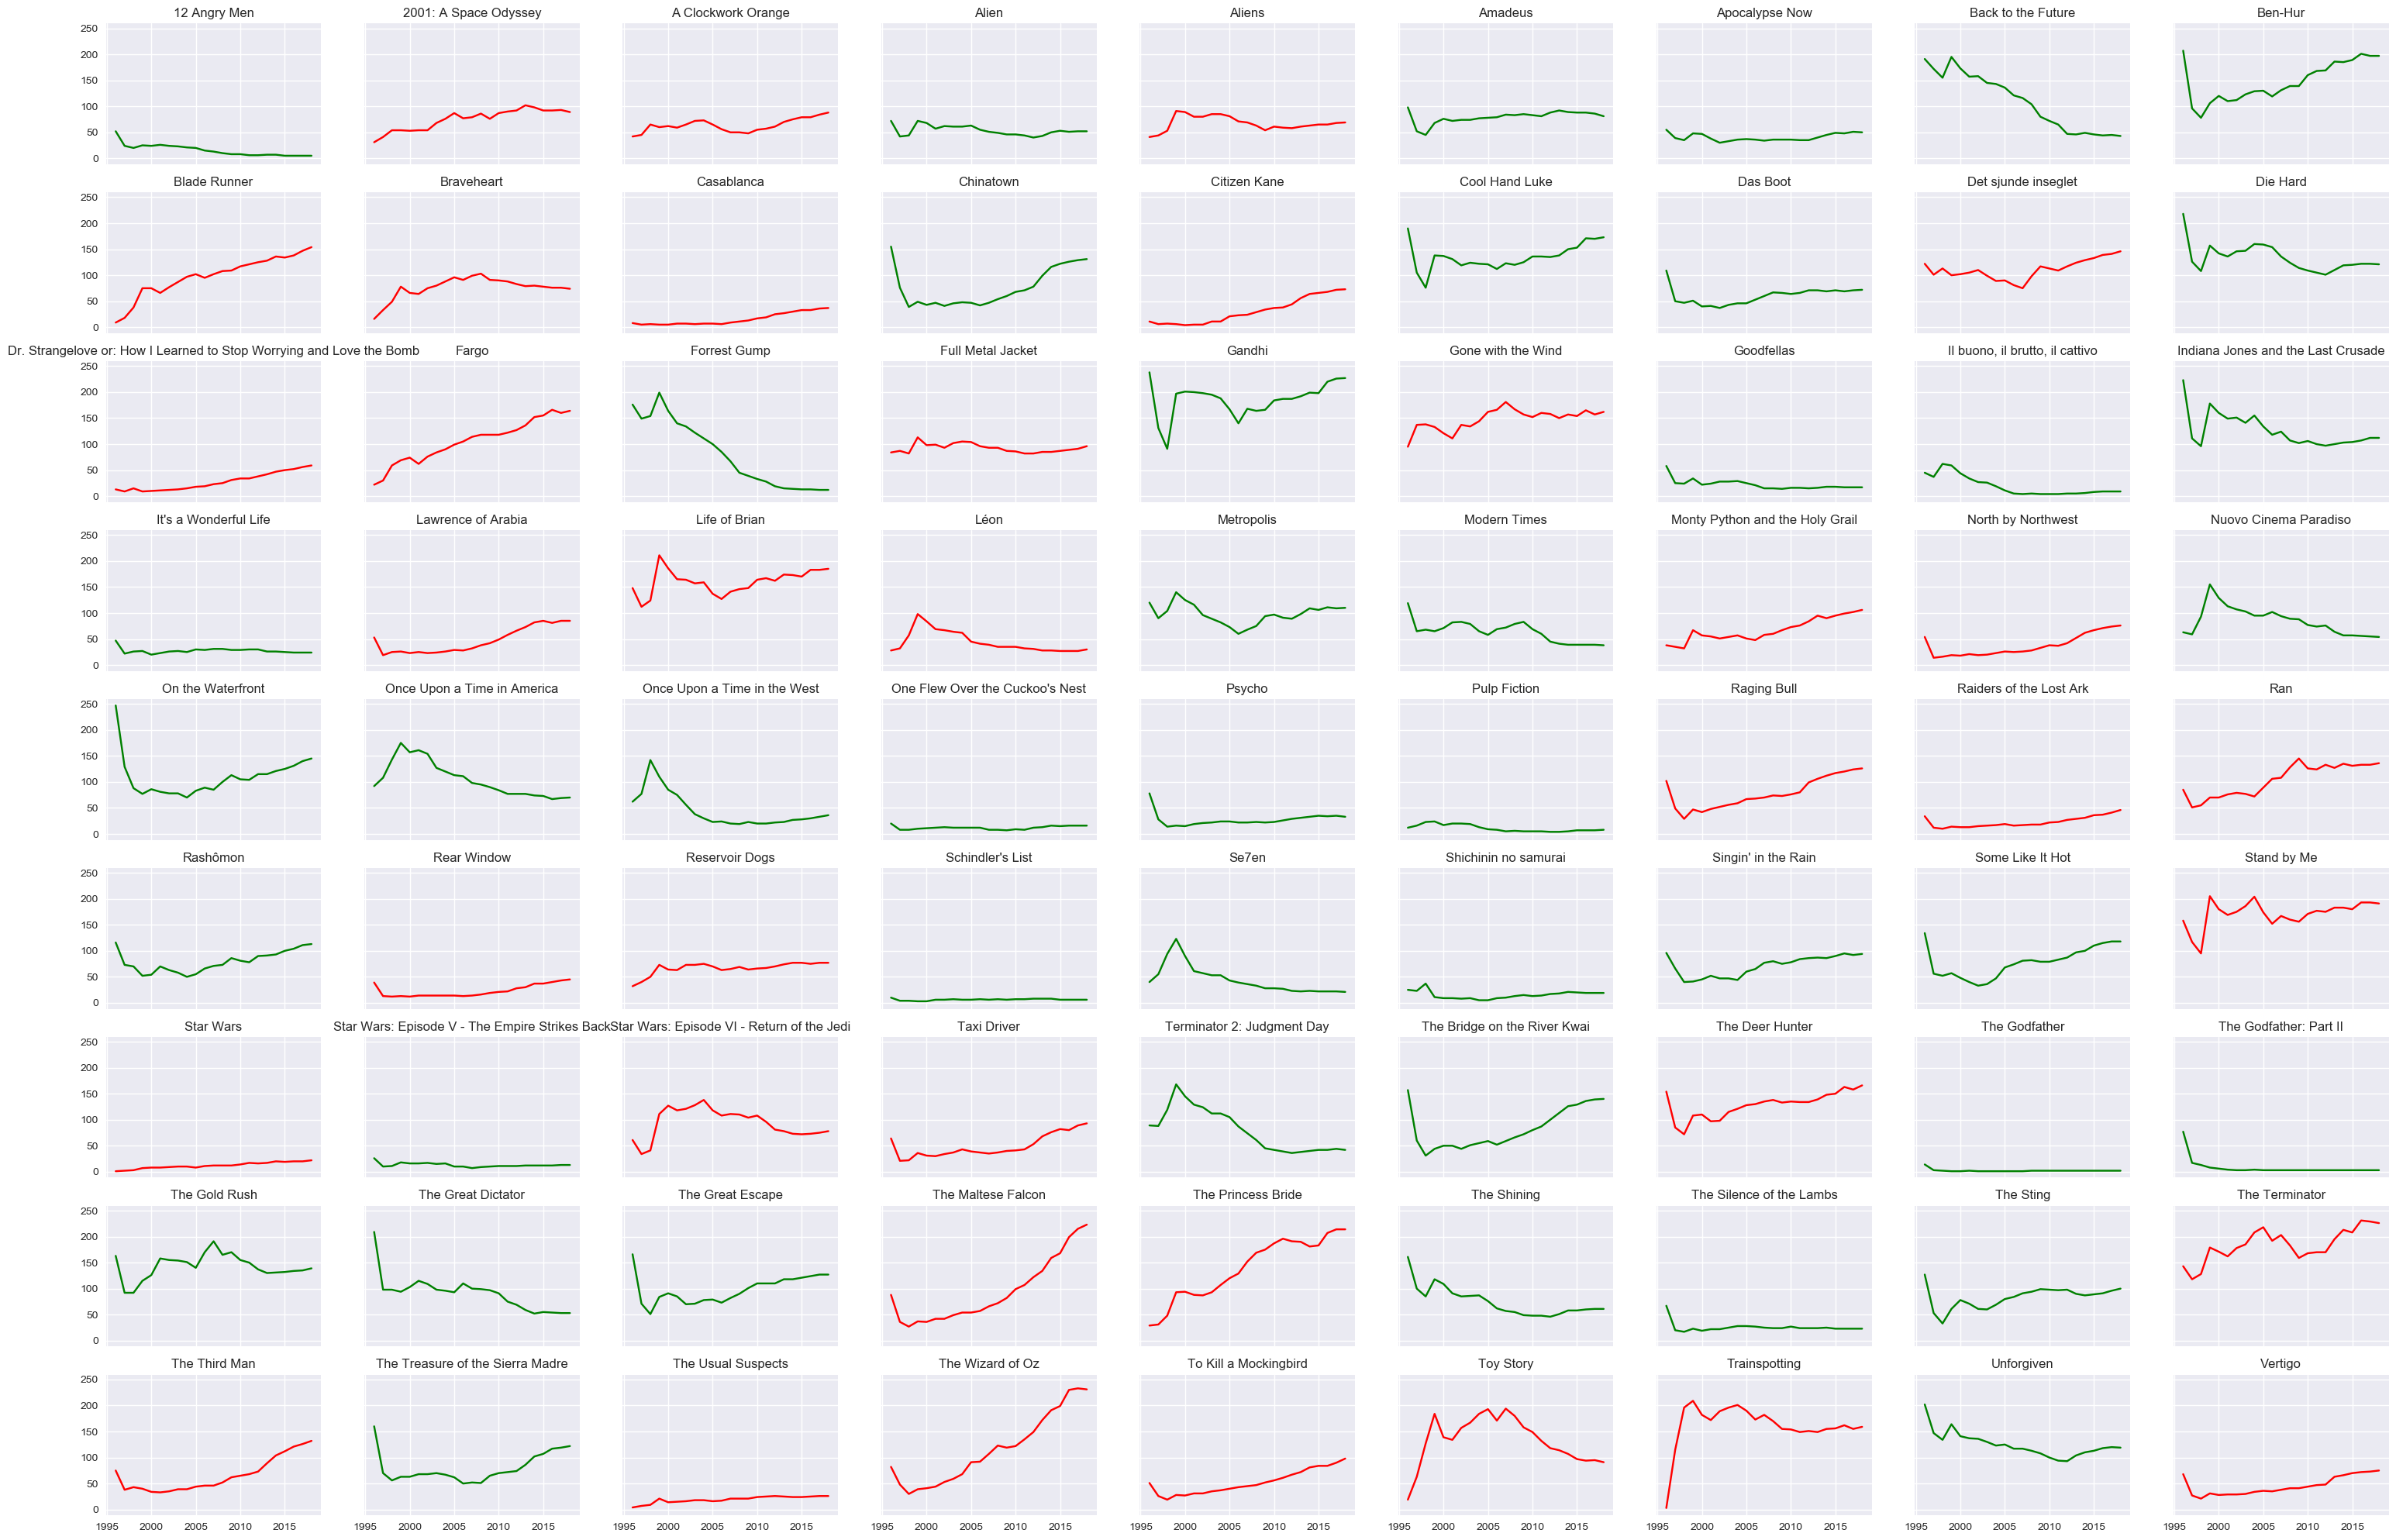

In [28]:
plt.style.use('seaborn')
x=np.arange(9)
coor=list(itertools.product(x, x))
fig, axes = plt.subplots(9, 9, figsize=(38,25), sharex=True, sharey=True)

years=df.IMDByear.unique().tolist()
for movie, c in zip(changes.Movie, coor):
    frame=df[df.Title==movie]
    ranks=frame.Ranking.tolist()
    x=c[0]
    y=c[1]
    if changes[changes.Movie==movie]['Ranks Change'][0] < 0:
        axes[x, y].plot(years, ranks, color='red')
        axes[x, y].set_title(movie)
    else:
        axes[x, y].plot(years, ranks, color='green')
        axes[x, y].set_title(movie)
        

# Best Movies for Top 1000 Voters for the movies on the lists:

In [29]:
#Top1000 Kullanıcı için en iyi 50 film: (listedeki 708 film için)
dfu=df.drop_duplicates('Title')
dfu['w_rate']=10*dfu.Rate10+9*dfu.Rate9+8*dfu.Rate8+7*dfu.Rate7+6*dfu.Rate6+5*dfu.Rate5+4*dfu.Rate4+3*dfu.Rate3+2*dfu.Rate2+dfu.Rate1
dfu['w_rate']=round(dfu['w_rate']/dfu['#top1000'], 2)
dfwr=dfu[['Title', 'Date', 'w_rate', 'Rating', 'Score', 'Votes', 'Gross']]
dfwr.sort_values('w_rate', ascending=False).head(50)

C:\Users\m.c\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\m.c\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Title,Date,w_rate,Rating,Score,Votes,Gross
13,The Godfather,1972,8.68,9.2,100.0,1473352,134.97
1,The Shawshank Redemption,1994,8.59,9.3,80.0,2146449,28.34
33,Raiders of the Lost Ark,1981,8.48,8.4,85.0,827333,248.16
66,The Silence of the Lambs,1991,8.43,8.6,85.0,1162258,130.74
71,Alien,1979,8.43,8.4,89.0,729360,78.90
44,"Il buono, il brutto, il cattivo",1966,8.41,8.8,90.0,637225,6.10
76,The Godfather: Part II,1974,8.40,9.0,90.0,1025354,57.30
77,Psycho,1960,8.32,8.5,97.0,551510,32.00
88,Terminator 2: Judgment Day,1991,8.31,8.5,75.0,926718,204.84
38,Rear Window,1954,8.31,8.5,100.0,408074,36.76


# Worst Movies for IMDB's Top1000 Voters for the movies on the lists

In [30]:
#Top1000 kullanıcı için en kötü 50 film (listedeki 708 film için)
dfwr.sort_values('w_rate').head(50)

,Title,Date,w_rate,Rating,Score,Votes,Gross
5153,Andaz Apna Apna,1994,4.38,8.2,NaN,46265,NaN
5156,Hera Pheri,2000,4.72,8.2,NaN,49659,NaN
5167,Munna Bhai M.B.B.S.,2003,5.02,8.2,NaN,66614,NaN
4664,Dil Chahta Hai,2001,5.04,8.1,NaN,62091,0.30
5238,Chak De! India,2007,5.07,8.2,68.0,68046,1.11
145,Tom and Huck,1995,5.13,5.5,NaN,9211,23.74
4412,Rang De Basanti,2006,5.35,8.2,NaN,102656,2.20
4738,"Swades: We, the People",2004,5.37,8.2,NaN,76254,1.22
4695,Gangs of Wasseypur,2012,5.38,8.2,89.0,71165,NaN
5225,Udaan,2010,5.40,8.2,NaN,39439,0.01


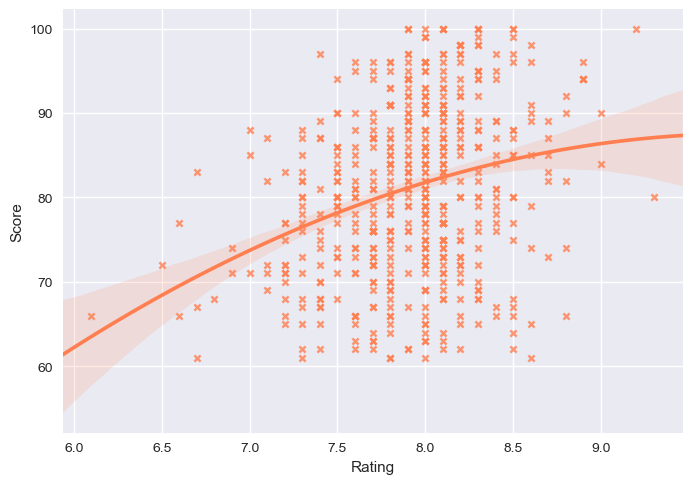

In [31]:
ax=sns.regplot('Rating', 'Score',  dfu, ci=90, scatter=True, scatter_kws={"s":20},
               order=2, fit_reg=True,color="coral", marker='x')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

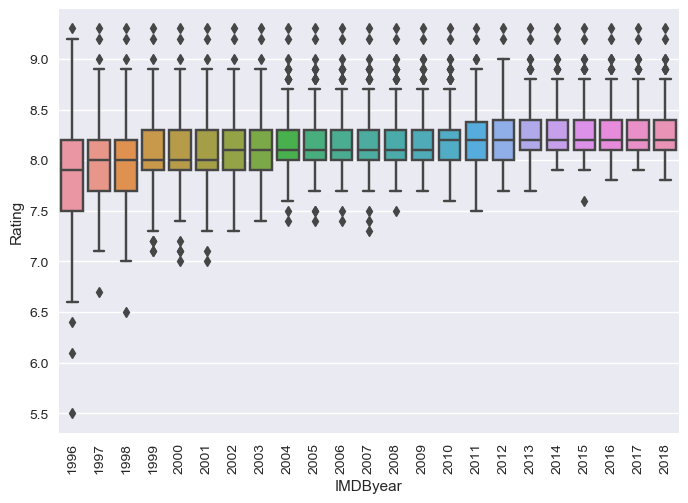

In [32]:
plt.figure()
sns.boxplot(x='IMDByear', y='Rating', data=df )
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

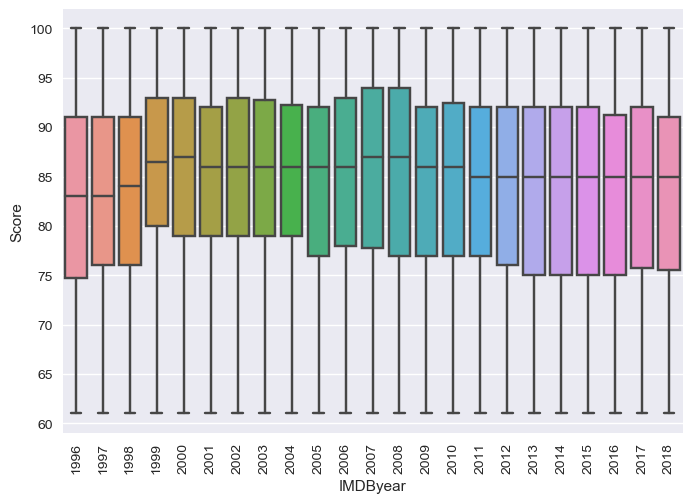

In [33]:
plt.figure()
sns.boxplot(x='IMDByear', y='Score', data=df)
plt.xticks(rotation=90)

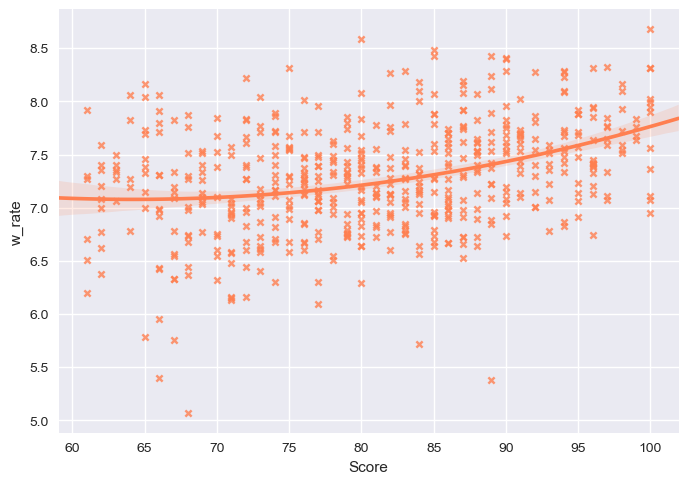

In [34]:
ax=sns.regplot('Score', 'w_rate',  dfwr, ci=90, scatter=True, scatter_kws={"s":20},
               order=2, fit_reg=True,color="coral", marker='x')

sns.despine()

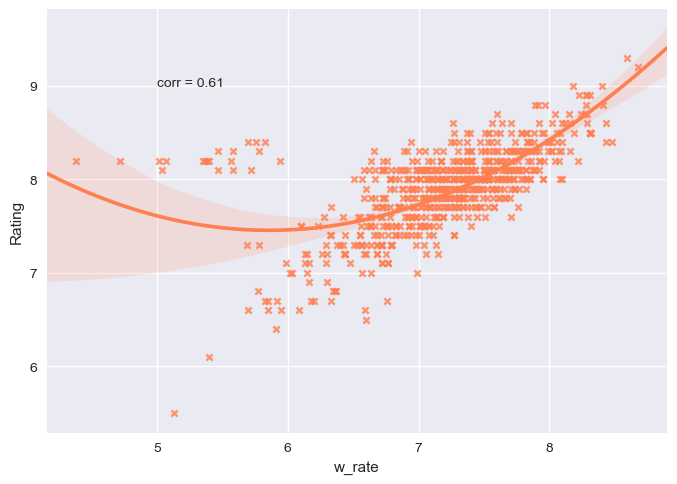

In [35]:
ax=sns.regplot('w_rate', 'Rating',  dfwr, ci=99, scatter=True, scatter_kws={"s":20},
               order=2, fit_reg=True,color="coral", marker='x')

ax.text(5,9,'corr = ' + str(round(np.corrcoef(dfwr['w_rate'], dfwr['Rating'])[0][1], 2)))

sns.despine()